In [3]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
from scipy.optimize import fsolve

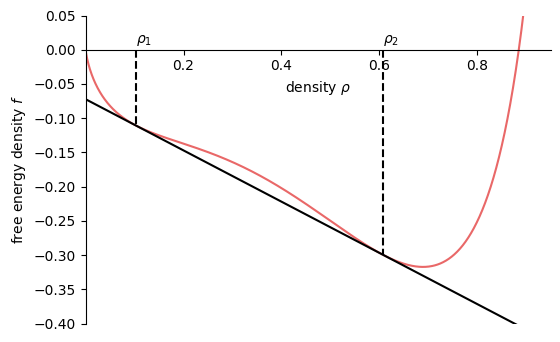

In [4]:
# Global parameters
kbt = 1 # --> all energy (f, a, ...) in units of k_B T
linear_coefficient = 2.5 # add a term linear in rho to f_vdw for a nicer plot
# this linear term has no impact on the conditions for phase coexistence

# Colors
grey = '#eeeeee' # light grey fill
line = '#e96868' # red line
nucleatn_color = '#6a8ba4' # dark blue for nucleation&growth
spinodal_color = '#BBDEF0' # light blue for spinodal decomposition

def f_vdw(rho, a, b):
    """
    Calculates the free energy density for a Van der Waals fluid.
    """
    return kbt*rho*(np.log(rho/(1-b*rho)) - 1) - a*rho**2 + linear_coefficient*kbt*rho

def f_vdw_prime(rho, a, b):
    """
    Calculates the derivative w.r.t. the density rho of the free energy
    density of a VdW fluid.
    """
    return kbt*np.log(rho/(1-b*rho)) + kbt*b*rho/(1-b*rho) - 2*a*rho + linear_coefficient*kbt

def conditions_for_coexistence(x, a, b):
    """
    Function that should be zero when phases coexist. A vector with
    one element mu1 - mu2, and one element p1 - p2.
    """
    rho1 = x[0]
    rho2 = x[1]
    mu1 = f_vdw_prime(rho1, a, b)
    mu2 = f_vdw_prime(rho2, a, b)
    f1 = f_vdw(rho1, a, b)
    f2 = f_vdw(rho2, a, b)
    mu_deficit = mu1 - mu2
    p_deficit  = rho1*mu1 - f1 - rho2*mu2 + f2
    return [mu_deficit, p_deficit]

def f_mix(rho_av, a, b):
    """
    Free energy density for a mixture of gas (density rho1) and liquid (density
    rho2). The gas and liquid densities (rho1 and rho2) are found numerically.
    """
    rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.7], args=(a,b))
    rho1 = rhosol[0]
    rho2 = rhosol[1]
    return f_vdw(rho1, a, b) + (f_vdw(rho2, a, b) - f_vdw(rho1, a, b))/(rho2-rho1) * (rho_av - rho1)

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
rho = np.linspace(0.001, 0.95, 1000)

# Set the parameters a and b
a = 4
b = 1

# Find the densities at which the gas and liquid phases coexist by solving
# numerically. If you use different a and b you might need to change the
# guesses, x0.
rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.8], args=(a,b))

## Make the plot
fig, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line)
ax.plot(rho, f_mix(rho, a, b), 'k')

# Create markers rho1 and rho2
rho1_marker_y = np.linspace(0, f_vdw(rhosol[0], a, b), 10)
rho1_marker_x = np.ones(rho1_marker_y.shape)*rhosol[0]
ax.plot(rho1_marker_x, rho1_marker_y, 'k--')
rho2_marker_y = np.linspace(0, f_vdw(rhosol[1], a, b), 10)
rho2_marker_x = np.ones(rho2_marker_y.shape)*rhosol[1]
ax.plot(rho2_marker_x, rho2_marker_y, 'k--')
ax.text(rhosol[0], 0.01, r'$\rho_1$')
ax.text(rhosol[1], 0.01, r'$\rho_2$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density", fig, display=False)

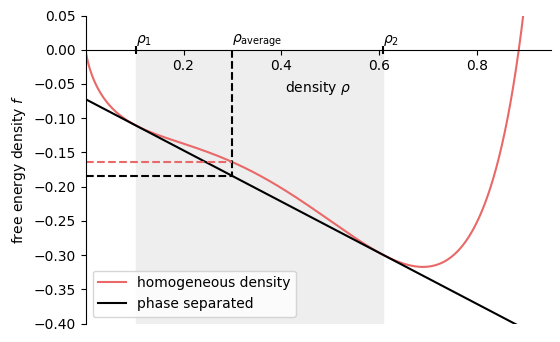

In [6]:
 fig2, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Grey area
ax.fill([rhosol[0], rhosol[0], rhosol[1], rhosol[1]],
        [0, -0.4, -0.4, 0],
        color=grey)

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line, label='homogeneous density')
ax.plot(rho, f_mix(rho, a, b), 'k', label='phase separated')

# Create markers for rho1 and rho2
ax.scatter(rhosol[0], 0, color='k', marker='|', zorder=10)
ax.scatter(rhosol[1], 0, color='k', marker='|', zorder=10)
ax.text(rhosol[0], 0.01, r'$\rho_1$', zorder=10)
ax.text(rhosol[1], 0.01, r'$\rho_2$', zorder=10)

# Create markers for rho_average
rhoavg = 0.3
rhoavg_marker_y = np.linspace(0, f_mix(rhoavg, a, b), 10)
rhoavg_marker_x = np.ones(rho1_marker_y.shape)*rhoavg
ax.plot(rhoavg_marker_x, rhoavg_marker_y, 'k--')
fmix_at_rhoavg = f_mix(rhoavg, a, b)
fvdw_at_rhoavg = f_vdw(rhoavg, a, b)
hline_x = np.linspace(0, rhoavg, 10)
mix_hline_y = np.ones(hline_x.shape)*fmix_at_rhoavg
vdw_hline_y = np.ones(hline_x.shape)*fvdw_at_rhoavg
ax.plot(hline_x, mix_hline_y, 'k--')
ax.plot(hline_x, vdw_hline_y, '--', color=line)
ax.text(rhoavg, 0.01, r'$\rho_\mathrm{average}$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Legend
ax.legend()

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density_again", fig2, display=False)

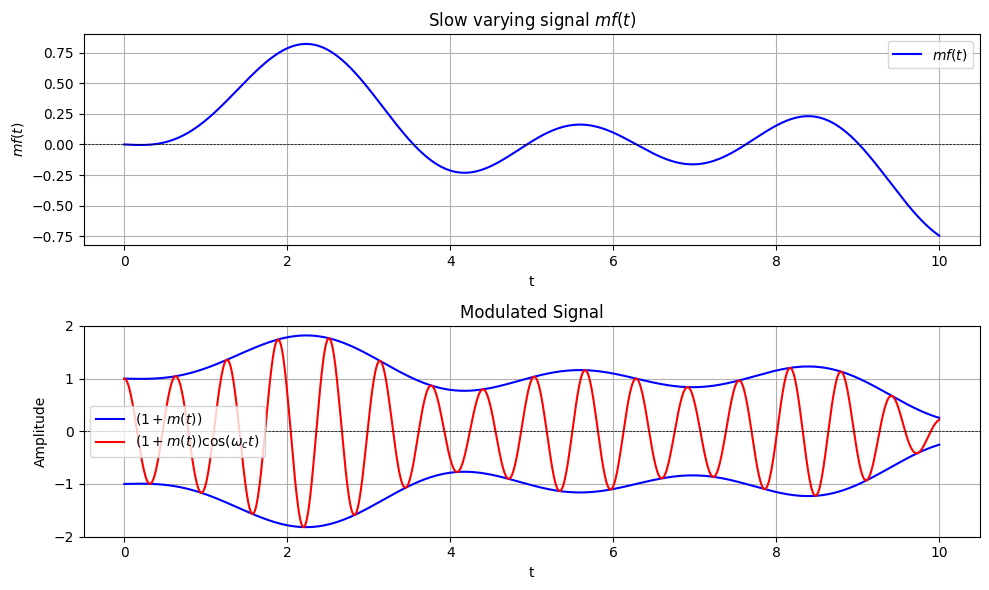

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Time values
t = np.linspace(0, 10, 1000)

# Blue signal: Slow varying function (e.g., sine wave)
m_t = (np.sin(0.5 * t) + np.sin(t) -0.8* np.sin(2*t))/3

# Red signal: Cosine wave modulated by (1 + m(t))
carrier_frequency = 10
red_signal = (1 + m_t) * np.cos(carrier_frequency * t)

# Plot the blue and red signals
plt.figure(figsize=(10, 6))

# Plot blue signal
plt.subplot(2, 1, 1)
plt.plot(t, m_t, label=r"$mf(t)$", color='blue')
plt.title("Slow varying signal $mf(t)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("t")
plt.ylabel("$mf(t)$")
plt.grid(True)
plt.legend()

# Plot red signal
plt.subplot(2, 1, 2)
plt.plot(t, 1 + m_t, label=r"$(1 + m(t))$", color='blue')
plt.plot(t, -1 - m_t, color='blue')
plt.plot(t, red_signal, label=r"$(1 + m(t)) \cos(\omega_c t)$", color='red')
plt.title("Modulated Signal")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
np.roll(data_noise,400)[400-5:400+5]

array([4, 3, 2, 1, 0, 0, 1, 2, 3, 4])

1000


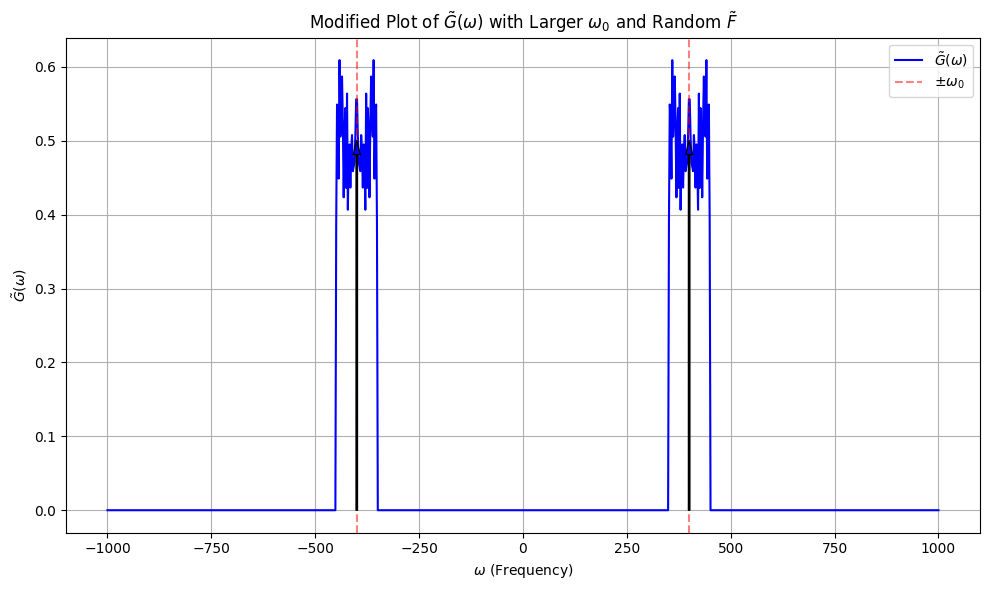

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# Increase omega_0 and make F_tilde more "random"
omega_0 = 400  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_noise = np.random.normal(1,0.1,len(omega)//2)
# data_noise = np.arange(len(omega)//2)
data_noise = np.hstack((data_noise,data_noise[::-1]))
print(len(data_noise))
# Define a more "random" F_tilde function using a noisy Gaussian
def F_tilde_random(omega,omega_0, sigma=50):
    rect = (omega<sigma)*(omega>-sigma)
    data = data_noise*rect
    data = np.roll(data,len(data)//2+np.abs(omega_0)-100)
    if omega_0<0:
        data = data[::-1]
    return data

# Reconstruct G_tilde with the new parameters
G_tilde = 0.5 * (
    m * F_tilde_random(omega, omega_0) +
    m * F_tilde_random(omega, - omega_0)
)

# Plot the function
plt.figure(figsize=(10, 6))

# Plot G_tilde
plt.plot(omega, G_tilde, label=r"$\tilde{G}(\omega)$", color='blue')

# Add more prominent arrows for the delta functions
arrow_props = dict(facecolor='blue', edgecolor='black', shrink=0, width=1, headwidth=5, headlength=10)
plt.annotate("", xy=(omega_0, 0.5), xytext=(omega_0, 0), arrowprops=arrow_props)
plt.annotate("", xy=(-omega_0, 0.5), xytext=(-omega_0, 0), arrowprops=arrow_props)

# Highlight the positions of the delta functions
plt.axvline(omega_0, color='red', linestyle='--', alpha=0.5, label=r"$\pm \omega_0$")
plt.axvline(-omega_0, color='red', linestyle='--', alpha=0.5)

plt.title(r"Modified Plot of $\tilde{G}(\omega)$ with Larger $\omega_0$ and Random $\tilde{F}$")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
*